In [52]:
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get data
X = np.array([(0,0), (2,0), (3,0), (0,2), (2,2), (5,1), (5,2), (2,4), (4,4), (5,5)])
y = np.array([-1, -1, -1, -1, -1,	1,	1,	1, 1, 1])
print(X, y)             

[[0 0]
 [2 0]
 [3 0]
 [0 2]
 [2 2]
 [5 1]
 [5 2]
 [2 4]
 [4 4]
 [5 5]] [-1 -1 -1 -1 -1  1  1  1  1  1]


In [61]:
df = pd.DataFrame(X)
df.columns = ["A","B"]
df["target"] = y
df

,A,B,target
0,0,0,-1
1,2,0,-1
2,3,0,-1
3,0,2,-1
4,2,2,-1
5,5,1,1
6,5,2,1
7,2,4,1
8,4,4,1
9,5,5,1


In [65]:
X = df.drop("target", axis=1)
y = df["target"]

print(X)
print(y)

   A  B
0  0  0
1  2  0
2  3  0
3  0  2
4  2  2
5  5  1
6  5  2
7  2  4
8  4  4
9  5  5
0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64


In [84]:
from sklearn import svm 

model = SVC(kernel="linear")
model.fit(X,y)

print(model.intercept_)
print(model.coef_)
print(model.get_params)

[-4.9990625]
[[0.9996875 1.       ]]
<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


In [85]:
y_pred = model.predict(X)
print(y_pred)

[-1 -1 -1 -1 -1  1  1  1  1  1]


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[5 0]
 [0 5]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



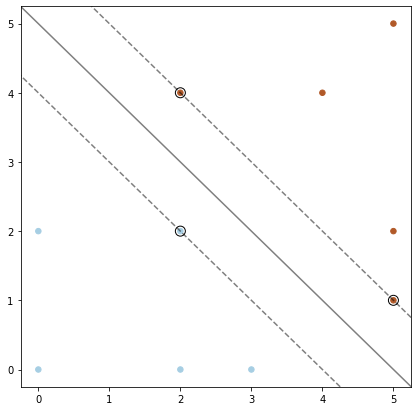

In [122]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=np.inf)
clf.fit(X, y)

plt.figure(figsize=(7,7))

plt.scatter(x1, x2, c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [123]:
print(clf.intercept_)
print(clf.coef_)

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

print(margin) # Should give us 1/2 * sqrt(2)
# print(clf.get_params)

[-4.9990625]
[[0.9996875 1.       ]]
0.7072172752514327


In [15]:
x1= [first for first, second in X]
x2= [second for first, second in X]

print(x1)
print(x2)

[0, 2, 3, 0, 2, 5, 5, 2, 4, 5]
[0, 0, 0, 2, 2, 1, 2, 4, 4, 5]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


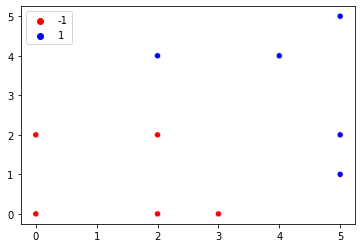

In [20]:
sns.scatterplot(x1,x2, hue=y, palette=["red", "blue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


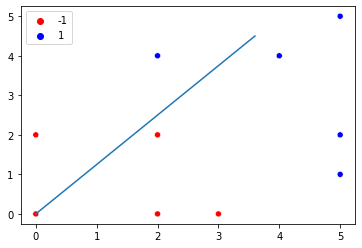

In [22]:
fig, ax = plt.subplots()

arr = np.arange(0,10)
ax.plot(arr * model.coef_[0][0], arr*model.coef_[0][1])
sns.scatterplot(x1,x2, hue=y, palette=["red", "blue"])

# Problem 2

In [36]:
import numpy as np 

labels = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])

x1 = np.array([0,2,1,0,3,4,5,1,4,5])
x2 = np.array([0,0,1,2,3,1,2,4,4,5])

mistakes = np.array([1,65,11,31,72,30,0,21,4,15])

# calculate phi
phis = np.array([(x_1**2, np.sqrt(2)*x_1*x_2, x_2**2) for x_1, x_2 in zip(x1, x2)])

# Init theta & theta_0
theta = np.zeros(3)
theta_0 = 0

# Update theta & theta_0
theta = np.dot(mistakes, phis * labels.reshape(-1,1))
theta_0 = np.sum(mistakes * labels)

print(phis)
print(phis.shape)
print(theta)
print(theta.shape)
print(theta_0)
print(labels.shape)

[[ 0.          0.          0.        ]
 [ 4.          0.          0.        ]
 [ 1.          1.41421356  1.        ]
 [ 0.          0.          4.        ]
 [ 9.         12.72792206  9.        ]
 [16.          5.65685425  1.        ]
 [25.         14.14213562  4.        ]
 [ 1.          5.65685425 16.        ]
 [16.         22.627417   16.        ]
 [25.         35.35533906 25.        ]]
(10, 3)
[ 21.       -22.627417  22.      ]
(3,)
-110
(10,)


In [2]:
# Problem 4

In [20]:
# Parameter Initialization
REG_PARAM = 1
u_1 = 0.01
u_2 = 1
v_1 = None
v_2 = None 

def cost(u_1, u_2, v_1, v_2, REG_PARAM):
  cost = 0.5 * (1- u_1* v_2)**2 + REG_PARAM * (u_1**2 + v_1**2)
  return cost 

def calculate_v(u_1):
  v_1 = 0
  v_2 = 1/u_1
  return v_1, v_2

def calculate_u(v_2, REG_PARAM):
  u_1 = v_2 / (v_2**2 + 2 * REG_PARAM)
  u_2 = 1
  return u_1, u_2

In [22]:
def training_loop(u_1, u_2, v_1, v_2, REG_PARAM, n_iters=1):
  for i in range(n_iters):
    v_1, v_2 = calculate_v(u_1)
    print(f"Here are the v's {v_1}, {v_2}")
    print(f"This is the cost {cost(u_1, u_2, v_1, v_2, REG_PARAM)}")
    print()

    u_1, u_2 = calculate_u(u_1, REG_PARAM)
    print(f"Here are the u's {u_1}, {u_2}")
    print(f"This is the cost {cost(u_1, u_2, v_1, v_2, REG_PARAM)}")
    print()

training_loop(u_1, u_2, v_1, v_2, REG_PARAM, n_iters=100)

Here are the v's 0, 100.0
This is the cost 0.0001

Here are the u's 0.004999750012499375, 1
This is the cost 0.12503749718768747

Here are the v's 0, 200.01000000000002
This is the cost 2.4997500187487496e-05

Here are the u's 0.002499843761327241, 1
This is the cost 0.1250093738868271

Here are the v's 0, 400.0249997500125
This is the cost 6.249218831046729e-06

Here are the u's 0.0012499179751581469, 1
This is the cost 0.1250023434460781

Here are the v's 0, 800.0524993437863
This is the cost 1.5622949446234418e-06

Here are the u's 0.0006249584993943214, 1
This is the cost 0.12500058585991775

Here are the v's 0, 1600.1062486055478
This is the cost 3.90573125965202e-07

Here are the u's 0.00031247918867417394, 1
This is the cost 0.1250001464648793

Here are the v's 0, 3200.2131221695945
This is the cost 9.764324335446999e-08

Here are the u's 0.00015623958670921698, 1
This is the cost 0.12500003661621356

Here are the v's 0, 6400.426556818377
This is the cost 2.4410808455066933e-08
